/home/bs00815/Desktop/probability_statistics_and_machine_learning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


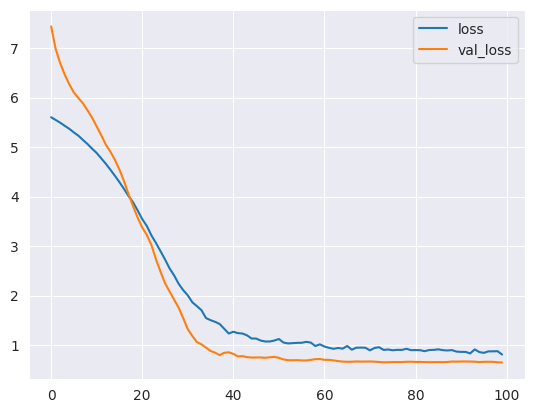

In [2]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers


red_wine = pd.read_csv('./data/red-wine.csv')

df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)


X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

/home/bs00815/Desktop/probability_statistics_and_machine_learning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/bs00815/Desktop/probability_statistics_and_machine_learning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


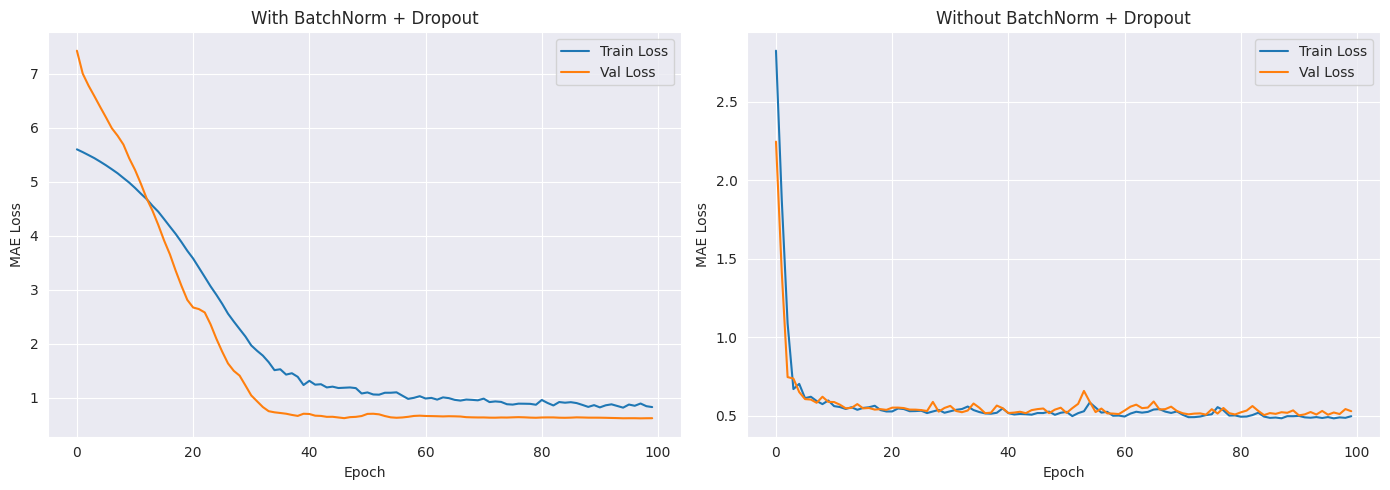

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset
red_wine = pd.read_csv('./data/red-wine.csv')

# Split dataset
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

# -------- Model 1: With BatchNorm + Dropout --------
model_bn_do = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

model_bn_do.compile(optimizer='adam', loss='mae')

history_bn_do = model_bn_do.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0
)

# -------- Model 2: Without BatchNorm + Dropout --------
model_plain = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[11]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

model_plain.compile(optimizer='adam', loss='mae')

history_plain = model_plain.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0
)

# -------- Plot side-by-side --------
history_df_bn_do = pd.DataFrame(history_bn_do.history)
history_df_plain = pd.DataFrame(history_plain.history)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: With BN + Dropout
axs[0].plot(history_df_bn_do['loss'], label='Train Loss')
axs[0].plot(history_df_bn_do['val_loss'], label='Val Loss')
axs[0].set_title('With BatchNorm + Dropout')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('MAE Loss')
axs[0].legend()

# Plot 2: Without BN + Dropout
axs[1].plot(history_df_plain['loss'], label='Train Loss')
axs[1].plot(history_df_plain['val_loss'], label='Val Loss')
axs[1].set_title('Without BatchNorm + Dropout')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE Loss')
axs[1].legend()

plt.tight_layout()
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


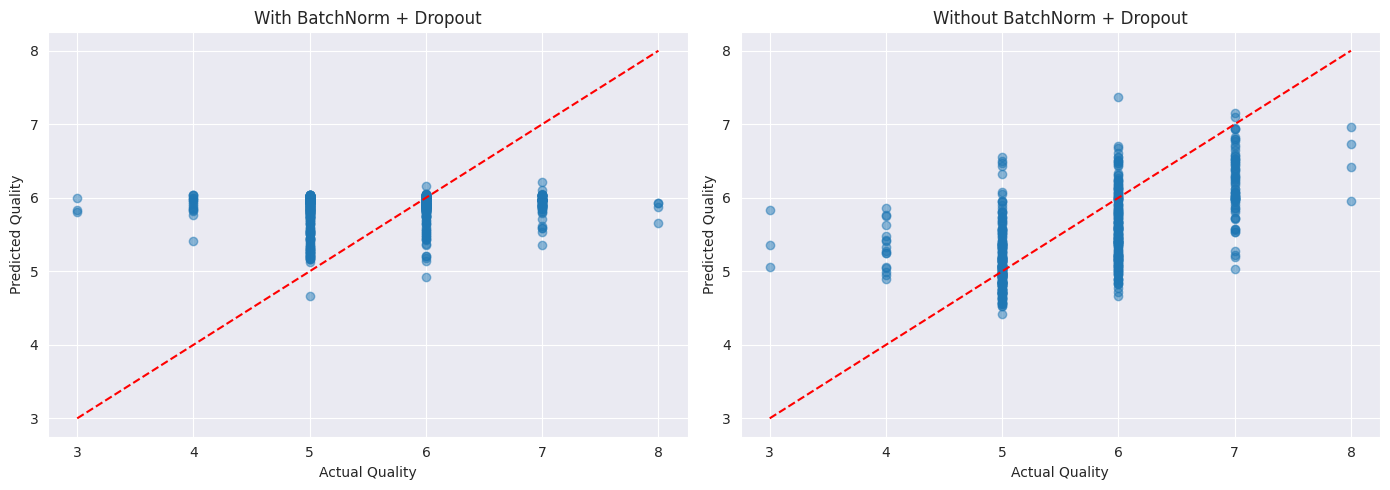

In [5]:
# Predict on validation data
y_pred_bn_do = model_bn_do.predict(X_valid)
y_pred_plain = model_plain.predict(X_valid)

# Convert to 1D array for easier plotting
y_pred_bn_do = y_pred_bn_do.flatten()
y_pred_plain = y_pred_plain.flatten()
y_true = y_valid.values

# -------- Plot Predicted vs Actual --------
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Model with BatchNorm + Dropout
axs[0].scatter(y_true, y_pred_bn_do, alpha=0.5)
axs[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
axs[0].set_title('With BatchNorm + Dropout')
axs[0].set_xlabel('Actual Quality')
axs[0].set_ylabel('Predicted Quality')

# Model without BatchNorm + Dropout
axs[1].scatter(y_true, y_pred_plain, alpha=0.5)
axs[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
axs[1].set_title('Without BatchNorm + Dropout')
axs[1].set_xlabel('Actual Quality')
axs[1].set_ylabel('Predicted Quality')

plt.tight_layout()
plt.show()
